In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from base_entities import ReviewDataset, GloveClassifier
from os.path import exists, join
import matplotlib
matplotlib.style.use('bmh')


In [2]:
res_path = join('.', 'model_data', 'results_df.csv')
results_df = pd.read_csv(res_path)

In [3]:
results_df.columns

Index(['Unnamed: 0', 'train_loss', 'test_loss', 'train_acc', 'test_acc'], dtype='object')

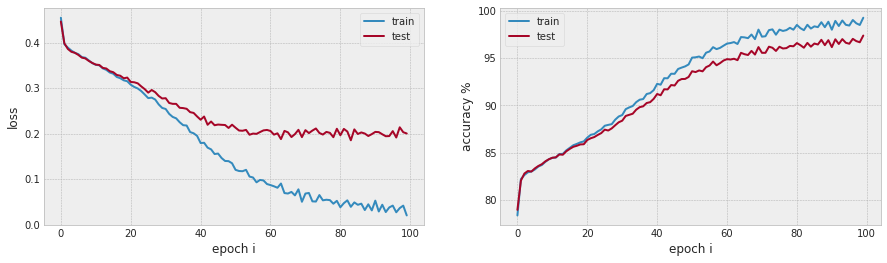

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].plot(results_df['train_loss'], label='train')
ax[0].plot(results_df['test_loss'], label='test')
ax[0].set_xlabel('epoch i')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(results_df['train_acc'], label='train')
ax[1].plot(results_df['test_acc'], label='test')
ax[1].set_xlabel('epoch i')
ax[1].set_ylabel('accuracy %')
ax[1].legend()

In [5]:
model_path = join('.', 'model_data', 'best_model.model')
model = GloveClassifier(200, 2, 512)
model.load_state_dict(torch.load(model_path))
model.eval()

GloveClassifier(
  (input_layer): Linear(in_features=200, out_features=512, bias=True)
  (hidden_layer1): Linear(in_features=512, out_features=1024, bias=True)
  (hidden_layer2): Linear(in_features=1024, out_features=512, bias=True)
  (output_layer): Linear(in_features=512, out_features=2, bias=True)
)

In [13]:
from helper_functions import load_tokenizer
tokenizer = load_tokenizer()

In [55]:
model(torch.tensor(X_bad)).argmax(), model(torch.tensor(X_good)).argmax()


(tensor(0), tensor(1))

In [56]:
model(torch.tensor(X_bad2)).argmax(), model(torch.tensor(X_good2)).argmax()

(tensor(1), tensor(1))

In [10]:
bad_review = "Great visuals, actors and actresses do their best to make it believable. Benedict Wong's character proves to be a bad-ass. Olsen also does her best. Cumberbatch is as usual. No bad things there. Even the cameos can, at some level, sell the plot points. OK! There is one important plot hole: at the end of WandaVision, Wanda learns hot to neutralize other people's magic. She does that at the magnitude of a town. In this movie, instead of using that same magic and by-pass the Sorcerer Supremes and their wizards, she tortures and kills them. Why? One important issue in character development: Wanda learns that her happiness means nothing if it is based on other people's misery at the end of WnadaVision. In this film, she has completely forgotten that lesson and at the end she learns it, again! Come on! Writers! Learn to respect these characters! Disney identity politics: Wanda kills the 3 male cameos (Picard, Jim from the Office, and some guy) easily. Literally, with her mind. OK. But she fights Carter and Captain Marvel, and Captain Marvel dies because of a statue falling on her! The same Captain Marvel, who pierced a hole in Thanos's spaceship, dies because of rubble?! And of course, she does not look for a universe where Vision is still alive. If you have noticed, I did not mention Dr. Strange. It is because Dr. Strange has NO function or importance in this movie. Cut out his scenes completely, and the plot will not change. In a Dr. Strange movie, Dr. Strange does not matter, at all. Edit: other than the VFX scenes, the worst photography and the worst editing in MCU."

In [18]:
X_bad = ReviewDataset.make_review_token(tokenizer, bad_review)
model(torch.tensor(X_bad)).argmax()

tensor(0)

In [19]:
good_review = "Absolutely blew my mind! I went in expecting to be disappointed because of the early reviews and concerns of it being only 2 hours! But wow!!! It was beyond what I expected! Coming from someone who is a huge marvel and comics fan along with horror this movie was a piece of art!!! As someone who thought spider man no way home was peak, this blows spider man no way home out the park! They didn't hold back at all Sam really did a great job putting his expert horror style into this! The cast was incredibly! Gomez as America Chavez is undoubtedly going to be one of the huge faces of marvel in the future she did an amazing job and made the character impossible not to like and root for! Olsen of course played the scarlet witch as expected making her horrifying in every second of the film! And of course Dr strange showcasing his raw power and his true kindness that not everyone sees, he might be one of the most hubris heroes but his genuine concern and protection of America Chavez showed why he is a true hero!!! The Illuminati scene was insane and easily showed the raw massive power that the scarlet witch holds. The only only thing I would change would be to make it 30 min to 1hour longer! It was so packed with non stop action and story telling I feel like more time would've allowed to give a little more and a little less of a bit rushed ending! Regardless it goes down on my list on top 3 marvel movies/comic book movies of all time!!!"

In [21]:
X_good = ReviewDataset.make_review_token(tokenizer, good_review)
model(torch.tensor(X_good)).argmax()

tensor(1)